### **Regresion Lineal y Logistica**

En el contexto de la IA y el aprendizaje automático, tanto la regresión lineal como la logística son técnicas esenciales.
Se utilizan para entrenar modelos predictivos a partir de datos históricos, que luego pueden hacer predicciones o clasificaciones en nuevos datos.

### **Regresion Logistica**

Se utiliza para modelar la relacion entre dos o más variables (1 dependiente y 1 o más independientes)
La principal diferencia entre la logistica y la lineal es que la variable dependiente de la logistica es binaria (si o no)
Los ejemplos máa comunes de uso son las predicciones o tendencias

En el caso de prediccion de precio de casas, podemos considerar diferentes variables independientes:
- Número de cuartos
- Metros cuadrados
- Número de pisos

La variable dependiente, podría si el precio de la casa es caro o no, para que de esta manera nuestra variable independiente sea binaria

La regresión logística, nos sirve en este caso para predecir si el precio de la casa es muy alto no. Basándonos en estas variables, analizamos cierta cantidad de datos (mientras más mejor) para de esta manera encontrar una relación y poder contestar la pregunta si el precio es o no es alto

En el siguiente ejercicio podemos ver como funcionan las variables dependientes e independientes, la división entre datos de entrenamiiento y prueba y también ver el resultado del modelo y la exactitud de las predcciones.


In [ ]:
!pip3 install numpy pandas matplotlib scikit-learn

In [1]:
# Importar las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("Todas las bibliotecas se importaron correctamente.")

Todas las bibliotecas se importaron correctamente.


In [2]:
# Generar datos sintéticos
np.random.seed(0)
n = 100

# Especificamos que el tamaño va de 500 a 3500 m2 y necesitamos generar n registros, en donde n = 100
tamaño = np.random.randint(500, 3500, n)

# Especificamos que el número de habitaciones es entre 1 y 5 y necesitamos generar n registros, en donde n = 100
habitaciones = np.random.randint(1, 5, n)

# 50,000 precio base, a esto hay que sumarle el extra por habitaciones y m2
# Multiplicamos tamaño por 50, significa que cada m2 aumenta el valor e la casa por 50 unidades (pesos)
# Multiplicamos numero de habitaciones por 10,000, significa que cada habitaicion extra, aumenta el valor de la casa por 10,000 unidades
# Generamos un array de n (100) numeros, simulando el valor de la casa dependiendo el mercado
precio = 50000 + (tamaño * 50) + (habitaciones * 10000) + (np.random.randn(n) * 10000)

# Clasificación binaria: 1 si el precio es mayor a 200000, 0 en caso contrario
es_cara = (precio > 200000).astype(int)

# Crear DataFrame
data = pd.DataFrame({
    'Tamaño (pies cuadrados)': tamaño,
    'Habitaciones': habitaciones,
    'Precio': precio,
    'Es cara': es_cara
})

# Guardar a CSV
data.to_csv('clasificacion_casas.csv', index=False)

In [3]:
# Cargar datos
data = pd.read_csv('clasificacion_casas.csv')

# Mostrar las primeras filas
print(data.head())

# Estadísticas descriptivas
# count: valores no nulos
# mean: promedio (suma de los valores de cada columna entre numero de filas)
# std: desviación estandar
# min: valor minimo por columna
# 25%: el 25% de las casa están por debajo de esos valores
# 50%: el 50% de las casa están por debajo de esos valores
# 75%: el 75% de las casa están por debajo de esos valores
# max: valor máximo por columna
print(data.describe())

   Tamaño (pies cuadrados)  Habitaciones         Precio  Es cara
0                     3232             1  230975.588422        1
1                     3107             4  242803.919082        1
2                     2153             2  187385.987123        0
3                     1335             3  148822.827724        0
4                     1263             1  134146.419727        0
       Tamaño (pies cuadrados)  Habitaciones         Precio     Es cara
count               100.000000    100.000000     100.000000  100.000000
mean               2171.320000      2.560000  184247.200240    0.400000
std                 890.389427      1.131014   46470.316648    0.492366
min                 584.000000      1.000000   91426.533442    0.000000
25%                1291.250000      1.000000  146897.246129    0.000000
50%                2349.500000      3.000000  187567.781266    0.000000
75%                2958.500000      3.250000  223723.158814    1.000000
max                3458.000000    

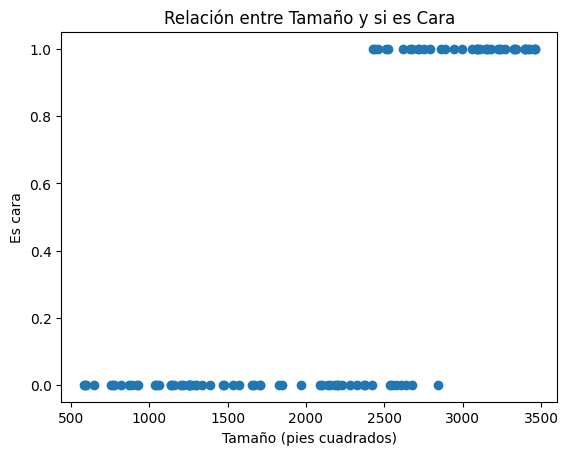

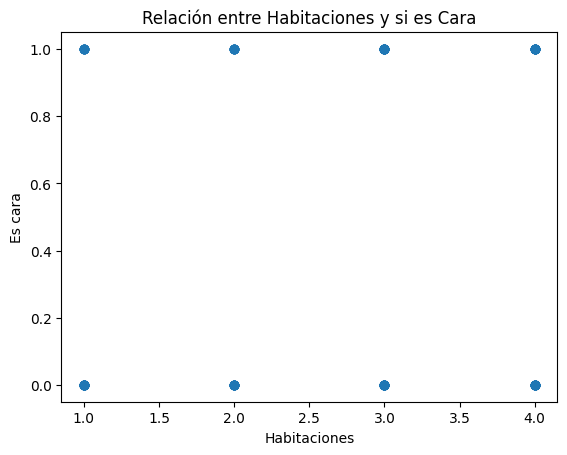

In [4]:
# Relación entre tamaño y si es cara
plt.scatter(data['Tamaño (pies cuadrados)'], data['Es cara'])
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Es cara')
plt.title('Relación entre Tamaño y si es Cara')
plt.show()

# Relación entre habitaciones y si es cara
plt.scatter(data['Habitaciones'], data['Es cara'])
plt.xlabel('Habitaciones')
plt.ylabel('Es cara')
plt.title('Relación entre Habitaciones y si es Cara')
plt.show()

# Las siguientes gráficas muestran cuáles casas son caras (1) o no (0), dependiendo de las variables independientes (tamaño y número de habitaciones respectivamente)

In [5]:
# train_test_split: se utiliza para dividir un conjunto de datos dos subconjuntos, uno para entrenamiento y otro para prueba

# variables independientes
X = data[['Tamaño (pies cuadrados)', 'Habitaciones']]

# variables dependientes o target, en regresión logistica tiene que ser binario 1 o 0
y = data['Es cara']

# Dividir en conjuntos de entrenamiento y prueba
# X variables que se usarán para la predicción
# y variable que queremos predecir
# test_size=0.2: indica que usaremos el 20% de los datos para el conjunto de prueb  a y el 80% para el conjunto de entrenamiento
# Conjunto de entrenamiento se usa para entrenar el modelo, se usa para enseñar al modelo la relacion entre los patrones en los datos (mientras mas, mejor)
# Conjunto de prueba se usa para comparar las predicciones y ver que tan acertadas son
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Crear el modelo
modelo = LogisticRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Coeficientes del modelo
# Intercepto: Representa la probabilidad de si una casa es cara o no cuando los m2 y habitaciones son 0
# Coeficientes
# Coeficiente para Tamaño (0.0117012): Un incremento de un pie cuadrado en el tamaño de la casa aumenta ligeramente 
# las probabilidades de que la casa sea clasificada como cara, con un aumento de aproximadamente un 1.17% 
# en las probabilidades por cada pie cuadrado adicional.
# Coeficiente para Habitaciones (1.30764309): Un incremento de una habitación en la casa aumenta significativamente
# las probabilidades de que la casa sea clasificada como cara, multiplicando las probabilidades por
# aproximadamente 3.697 (o aumentando las probabilidades en un 269.7%) por cada habitación adicional.
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: [-33.88475605]
Coeficientes: [[0.0117012  1.30764309]]


In [7]:
# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Evaluar el modelo
# Matriz de Confusión: muestra el rendimiento del modelo de clasificación comparando las predicciones del modelo 
# con los valores verdaderos (reales) de los datos de prueba.

# [[12  0]
# [ 2  6]]
# Matriz de confusion:
# True Positives (TP): 6 (número de veces que el modelo predijo correctamente que una casa es cara).
# True Negatives (TN): 12 (número de veces que el modelo predijo correctamente que una casa no es cara).
# False Positives (FP): 0 (número de veces que el modelo predijo incorrectamente que una casa es cara cuando no lo es).
# False Negatives (FN): 2 (número de veces que el modelo predijo incorrectamente que una casa no es cara cuando en realidad sí lo es).

# Reporte de Clasificación:
#    class   precision  recall   f1-score   support
#      0       0.86      1.00      0.92        12
#      1       1.00      0.75      0.86         8

# Clase 0 (no es cara):
# Precisión (precision): 0.86 (el 86% de las predicciones de que una casa no es cara fueron correctas).
# Recall (recall): 1.00 (el modelo identificó correctamente el 100% de las casas que no son caras).
# F1-score: 0.92 (la media  de la precisión y el recall).

# Clase 1 (es cara):
# Precisión (precision): 1.00 (el 100% de las predicciones de que una casa es cara fueron correctas).
# Recall (recall): 0.75 (el modelo identificó correctamente el 75% de las casas que son caras).
# F1-score: 0.86 (la media de la precisión y el recall).


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:\n", conf_matrix)
print("Reporte de Clasificación:\n", class_report)
print("Precisión:", accuracy)

Matriz de Confusión:
 [[12  0]
 [ 2  6]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.75      0.86         8

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

Precisión: 0.9


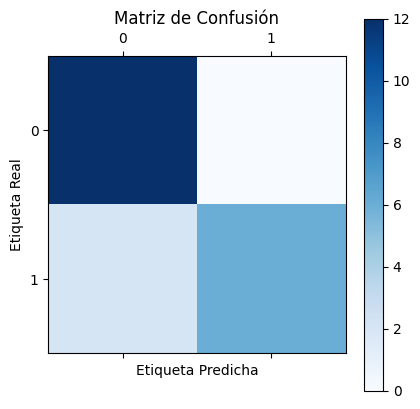

In [8]:
# Visualizar la matriz de confusión
# El siguiente gráfico proporciona una representacion visual de la matriz de confusión, en donde
# por medio del color code podemos ver más rápidamente la precision, donde:
# [TN  FP]
# [FN  TP]
# True Positives (TP): 6 (número de veces que el modelo predijo correctamente que una casa es cara).
# True Negatives (TN): 12 (número de veces que el modelo predijo correctamente que una casa no es cara).
# False Positives (FP): 0 (número de veces que el modelo predijo incorrectamente que una casa es cara cuando no lo es).
# False Negatives (FN): 2 (número de veces que el modelo predijo incorrectamente que una casa no es cara cuando en realidad sí lo es).
plt.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()